In [1]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
base_dir = 'dataset/images_train_test_val'
img_size = 128
batch_size = 32
num_classes = 21 

In [3]:
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
val_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [4]:
train_generator = train_datagen.flow_from_directory(
    directory=os.path.join(base_dir, "train"),
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 7350 images belonging to 21 classes.


In [5]:
val_generator = val_datagen.flow_from_directory(
    directory=os.path.join(base_dir, "validation"),
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 2100 images belonging to 21 classes.


In [6]:
test_generator = test_datagen.flow_from_directory(
    directory=os.path.join(base_dir, "test"),
    target_size=(img_size, img_size),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

Found 1050 images belonging to 21 classes.


In [7]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
for layer in base_model.layers:
    layer.trainable = False

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [8]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [9]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

c:\Users\shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 219s 939ms/step - accuracy: 0.5187 - loss: 1.6754 - val_accuracy: 0.8419 - val_loss: 0.5794
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 222s 965ms/step - accuracy: 0.8260 - loss: 0.6022 - val_accuracy: 0.8548 - val_loss: 0.4836
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 234s 1s/step - accuracy: 0.8694 - loss: 0.4234 - val_accuracy: 0.8648 - val_loss: 0.4122
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 229s 995ms/step - accuracy: 0.9046 - loss: 0.3184 - val_accuracy: 0.8833 - val_loss: 0.3717
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 206s 897ms/step - accuracy: 0.9178 - loss: 0.2614 - val_accuracy: 0.8819 - val_loss: 0.3643
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 202s 879ms/step - accuracy: 0.9299 - loss: 0.2137 - val_accuracy: 0.8871 - val_loss: 0.3531
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 205s 890ms/step - accuracy: 0.9431 - loss: 0.1752 - val_accuracy: 0.8890 - val_loss: 0.3716
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 230s 1s/step - accuracy: 0.9555 - loss:

In [11]:
model.save('E:/Research2/Xception.keras')

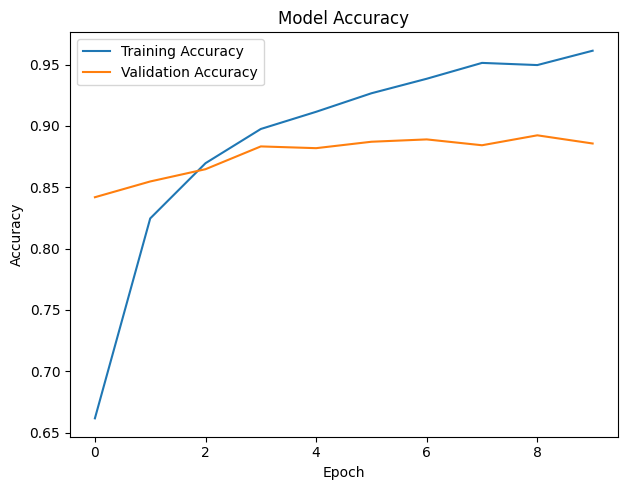

In [12]:
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

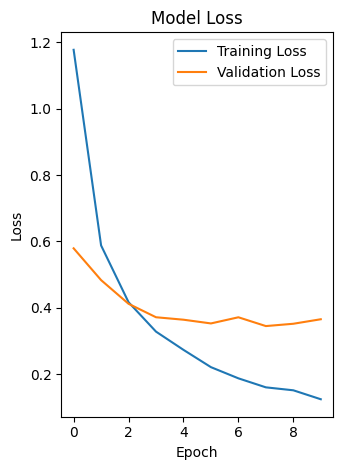

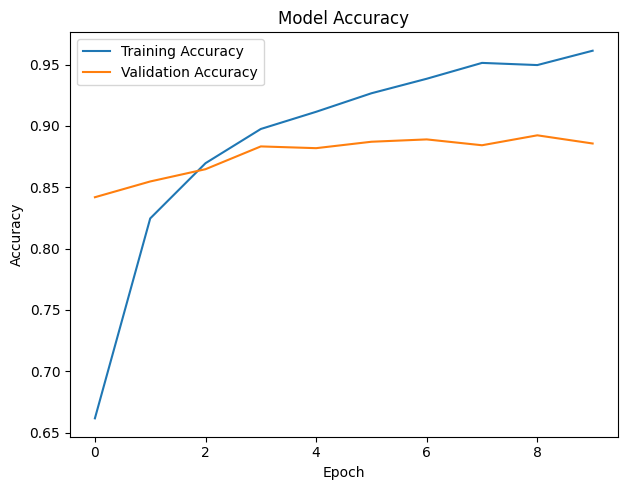

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

plot_training_history(history)

In [14]:
model = load_model('E:/Research2/Xception.keras')

In [15]:
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 50s 45ms/step - accuracy: 0.9324 - loss: 0.2227
Test Accuracy: 90.19%
Test Loss: 0.3325


In [16]:
test_generator.reset()
predictions = []
for i in range(len(test_generator)):
    pred = model.predict(test_generator[i][0])
    predictions.append(np.argmax(pred, axis=1)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━

In [17]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(true_classes, predictions, target_names=class_labels))

Classification Report:
                   precision    recall  f1-score   support

     agricultural       0.98      0.98      0.98        50
         airplane       0.98      0.92      0.95        50
  baseballdiamond       0.89      0.94      0.91        50
            beach       0.94      0.98      0.96        50
        buildings       0.78      0.94      0.85        50
        chaparral       1.00      1.00      1.00        50
 denseresidential       0.76      0.76      0.76        50
           forest       0.98      0.98      0.98        50
          freeway       0.89      0.96      0.92        50
       golfcourse       0.92      0.88      0.90        50
           harbor       1.00      0.96      0.98        50
     intersection       0.91      0.84      0.88        50
mediumresidential       0.73      0.76      0.75        50
   mobilehomepark       0.78      0.84      0.81        50
         overpass       0.98      0.82      0.89        50
       parkinglot       0.94    

In [18]:
precision = precision_score(true_classes, predictions, average='weighted')
recall = recall_score(true_classes, predictions, average='weighted')
f1 = f1_score(true_classes, predictions, average='weighted')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.9058
Recall: 0.9019
F1 Score: 0.9021


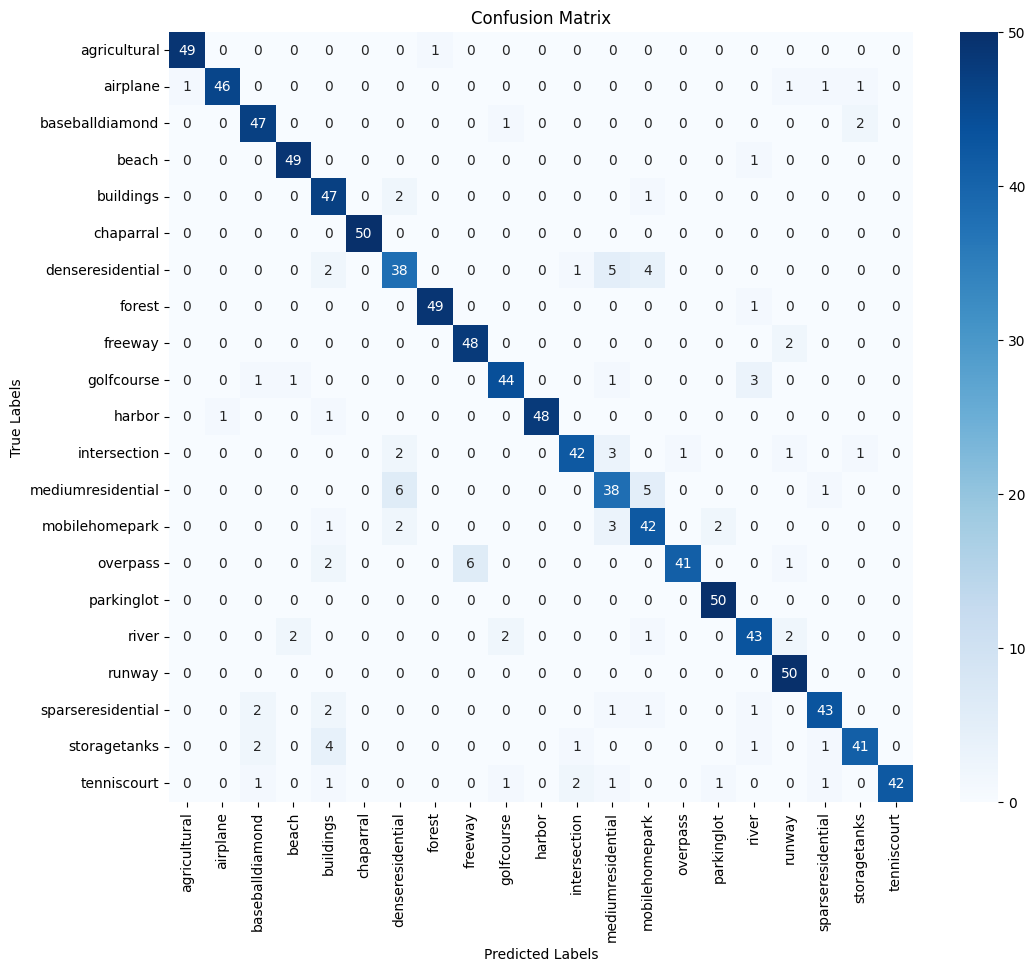

In [19]:
def plot_confusion_matrix(true_classes, predictions, class_labels):
    cm = confusion_matrix(true_classes, predictions)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

plot_confusion_matrix(true_classes, predictions, class_labels)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

class_names = [
    "agricultural", "airplane", "baseballdiamond", "beach", "buildings",
    "chaparral", "denseresidential", "forest", "freeway", "golfcourse",
    "harbor", "intersection", "mediumresidential", "mobilehomepark", 
    "overpass", "parkinglot", "river", "runway", "sparseresidential", 
    "storagetanks", "tenniscourt"
]

In [ ]:
def classify_new_image(model_path, img_path, img_size=128):
    model = load_model(model_path)
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions[0])
    predicted_class = class_names[predicted_index]
    confidence_score = predictions[0][predicted_index]

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class} ({confidence_score:.2f})")
    plt.show()

    return predicted_class, confidence_score

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


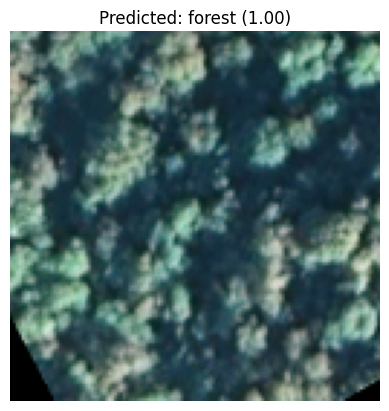

Predicted class: forest


In [22]:
predicted_class, confidence = classify_new_image('E:/Research2/Xception.keras', 'E:/Research2/LUSC/images_train_test_val/test/forest/forest_000021.png')
print(f"Predicted class: {predicted_class}")

In [24]:
total_inference_time = 0
num_samples = len(test_generator)

In [25]:
for i in range(num_samples):
    img, label = test_generator[i]  # Get the image and label

    # Start timing
    start_time = time.time()
    model.predict(img)  # Perform inference
    end_time = time.time()

    # Calculate time taken for this prediction and add to total
    inference_time = end_time - start_time
    total_inference_time += inference_time

# Calculate average inference time per image
average_inference_time = total_inference_time / num_samples
print(f"Average Inference Time per Image: {average_inference_time:.4f} seconds")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/ste